In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
url = 'https://raw.githubusercontent.com/boosuro/profit_estimation_of_companies/master/1000_Companies.csv'

In [39]:
df = pd.read_csv(url)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [12]:
tabel_corelatie = df.drop(columns='State', inplace = False).corr()
tabel_corelatie

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


<Axes: >

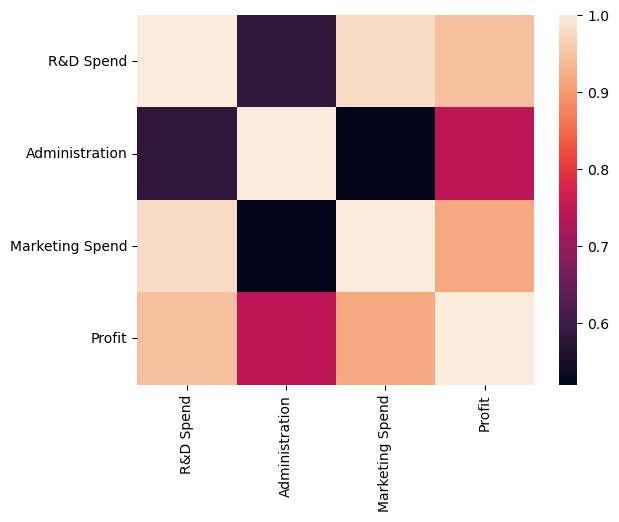

In [13]:
sns.heatmap(tabel_corelatie)

In [14]:
df.shape

(1000, 5)

In [15]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [17]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

<Axes: xlabel='State', ylabel='Profit'>

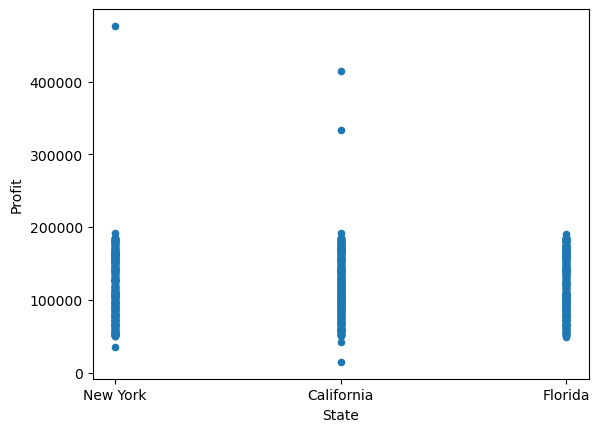

In [18]:
df.plot(kind = 'scatter', x ='State', y = 'Profit')



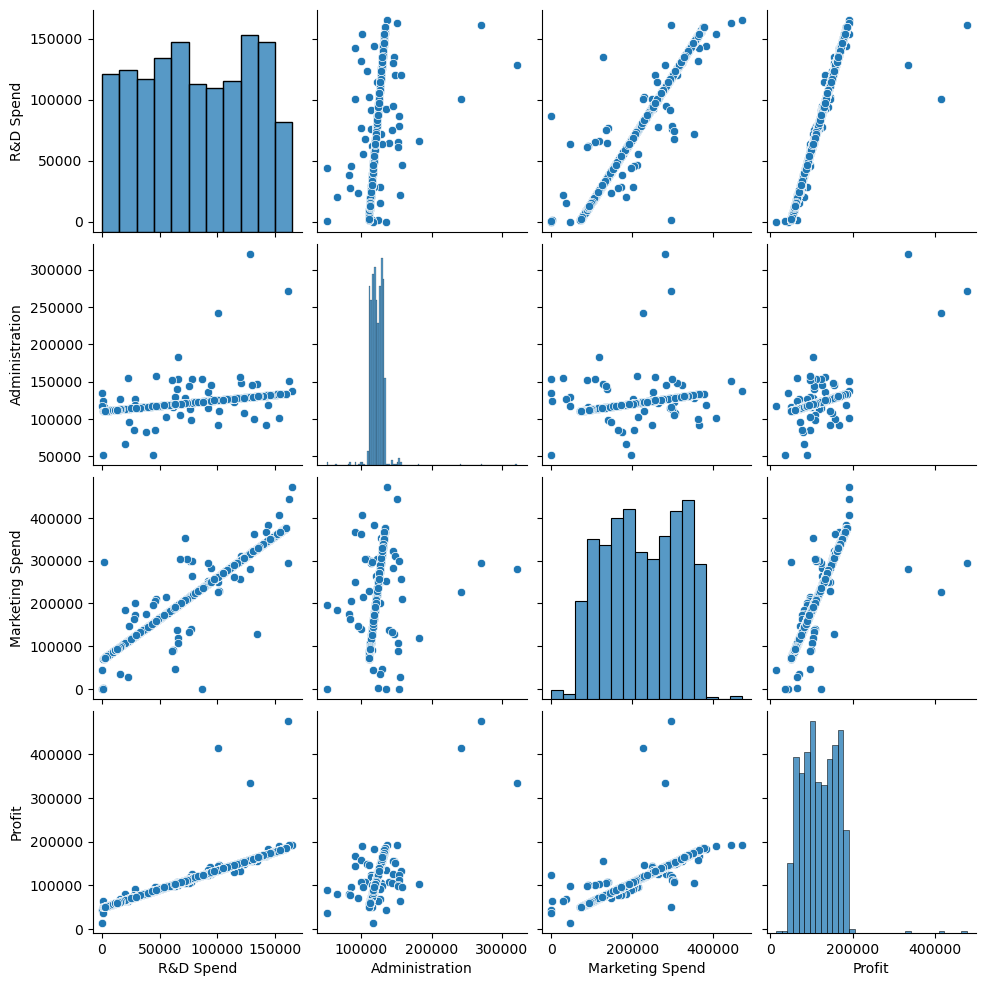

In [19]:
sns.pairplot(df)

In [20]:
df2 = df.copy()
y = df2['Profit']
df2 = df2.drop(columns = "Profit")

In [21]:
df2

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.800,471784.1000,New York
1,162597.70,151377.590,443898.5300,California
2,153441.51,101145.550,407934.5400,Florida
3,144372.41,118671.850,383199.6200,New York
4,142107.34,91391.770,366168.4200,Florida
...,...,...,...,...
995,54135.00,118451.999,173232.6695,California
996,134970.00,130390.080,329204.0228,California
997,100275.47,241926.310,227142.8200,California
998,128456.23,321652.140,281692.3200,California


In [22]:
# Transformarea atributului discret State in dummy variabile
df2 = pd.get_dummies(df2, columns=["State"], prefix=["State_is"] )
X = df2
X

,R&D Spend,Administration,Marketing Spend,State_is_California,State_is_Florida,State_is_New York
0,165349.20,136897.800,471784.1000,False,False,True
1,162597.70,151377.590,443898.5300,True,False,False
2,153441.51,101145.550,407934.5400,False,True,False
3,144372.41,118671.850,383199.6200,False,False,True
4,142107.34,91391.770,366168.4200,False,True,False
...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,True,False,False
996,134970.00,130390.080,329204.0228,True,False,False
997,100275.47,241926.310,227142.8200,True,False,False
998,128456.23,321652.140,281692.3200,True,False,False


In [23]:
df3 = pd.get_dummies(df, columns=["State"])
df3

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.800,471784.1000,192261.83000,False,False,True
1,162597.70,151377.590,443898.5300,191792.06000,True,False,False
2,153441.51,101145.550,407934.5400,191050.39000,False,True,False
3,144372.41,118671.850,383199.6200,182901.99000,False,False,True
4,142107.34,91391.770,366168.4200,166187.94000,False,True,False
...,...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,95279.96251,True,False,False
996,134970.00,130390.080,329204.0228,164336.60550,True,False,False
997,100275.47,241926.310,227142.8200,413956.48000,True,False,False
998,128456.23,321652.140,281692.3200,333962.19000,True,False,False


# Exercitiu: 
Sa se aplice RandomForestRegressor pentru modelare.

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics, linear_model

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


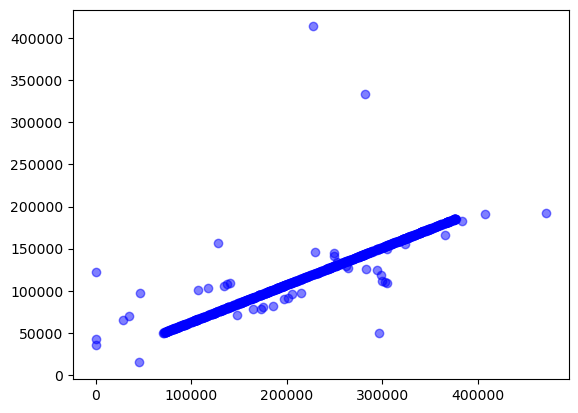

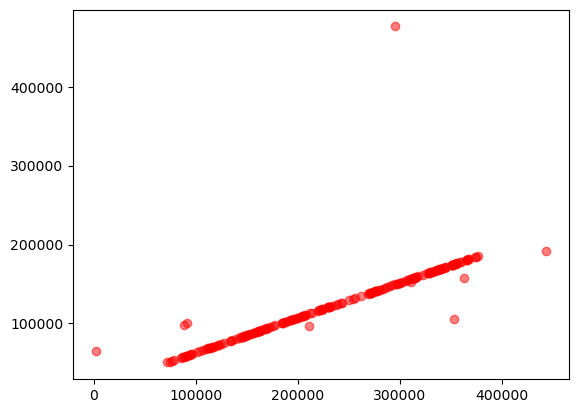

In [63]:
plt.scatter(X_train['Marketing Spend'], y_train, color ='b', alpha = 0.5)
plt.show()
plt.scatter(X_test['Marketing Spend'], y_test, color ='r', alpha = 0.5)
plt.show()

In [70]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0)
#model =  linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)




In [71]:
metrics.r2_score(y_test,y_pred)

0.9504795217997264

In [72]:
error = metrics.mean_absolute_error(y_test, y_pred)
error

1106.3991844260136

# Exercitiu: 
Sa se determine coeficientii si intercept pentru estimarea Profitului cu algoritmul LinearRegression.
Sa se scrie ecuatia dreptei corespunzatoare.


In [73]:
from sklearn import metrics, linear_model

model =  linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
 



In [74]:
metrics.r2_score(y_test,y_pred)


0.9112695892268795

In [75]:
metrics.mean_absolute_error(y_test, y_pred)

2300.2217509833463

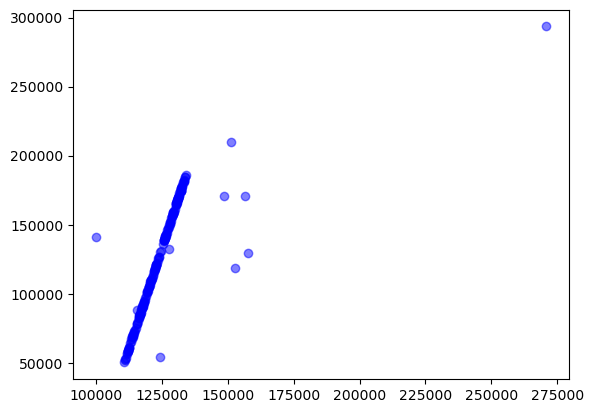

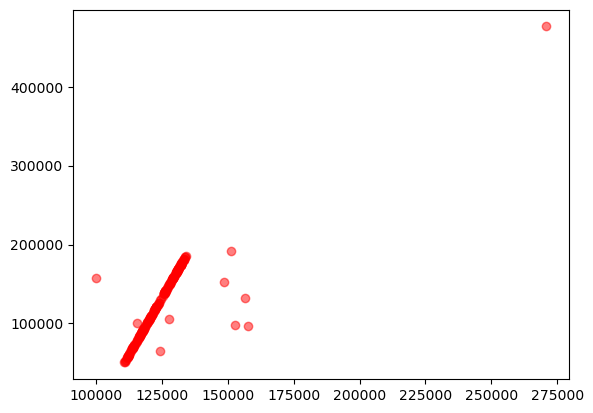

In [78]:
plt.scatter(X_test['Administration'], y_pred, color ='b', alpha=0.5)
plt.show()
plt.scatter(X_test['Administration'], y_test, color ='r', alpha=0.5)
plt.show()

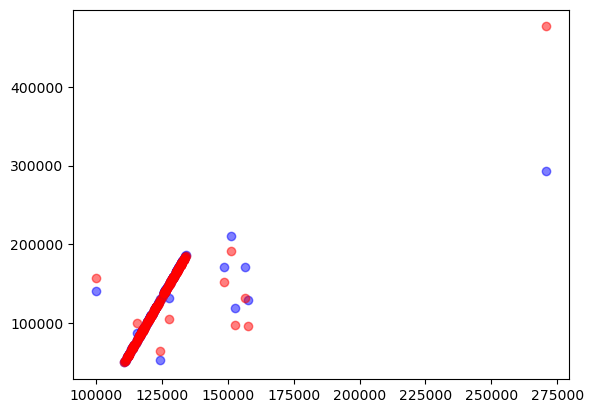

In [79]:
plt.scatter(X_test['Administration'], y_pred, color ='b', alpha=0.5)

plt.scatter(X_test['Administration'], y_test, color ='r', alpha=0.5)


# Implementarea: date noi


In [80]:
X_test

,R&D Spend,Administration,Marketing Spend,State_is_California,State_is_Florida,State_is_New York
993,46798.0,117368.4374,159075.9080,True,False,False
859,45209.0,117133.7666,156009.9281,True,False,False
298,52746.0,118246.8651,170552.5902,True,False,False
553,147916.0,132302.0043,354183.3651,False,True,False
672,40178.0,116390.7656,146302.5999,False,False,True
...,...,...,...,...,...,...
679,135489.0,130466.7283,330205.4347,True,False,False
722,139729.0,131092.9108,338386.5263,False,True,False
215,113478.0,127216.0435,287735.1501,True,False,False
653,107750.0,126370.1064,276682.9584,False,False,True


In [81]:
new = [[45600, 120000, 150000, 1, 0, 0]]

In [82]:
model.predict(new)

array([90406.38540903])

**RandomForest Regressor**

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
model = RandomForestRegressor(random_state=0)
#model =  linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
error = metrics.mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print ("score:", score)
 

score: 0.9504795217997264


**GradientBoostingRegressor**

In [84]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.r2_score(y_test, y_pred))


0.9537785613963606


**Linear Regression**

In [85]:
model =  linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
error = metrics.mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print ("score:", score)
print("coeficientii:")
print(model.coef_)
print("intersectia cu Oy")
print(model.intercept_)


score: 0.9112695892268795
coeficientii:
[ 5.25845857e-01  8.44390881e-01  1.07574255e-01  5.26235224e+02
 -3.54301375e+02 -1.71933849e+02]
intersectia cu Oy
-51561.46494777105


0.9527760108871862


[Text(0.5, 0.875, 'x[0] <= 82618.0\nsquared_error = 1750673715.222\nsamples = 800\nvalue = 118552.284'),
 Text(0.25, 0.625, 'x[0] <= 40391.0\nsquared_error = 411291080.729\nsamples = 413\nvalue = 84489.659'),
 Text(0.125, 0.375, 'x[0] <= 20049.795\nsquared_error = 118316409.735\nsamples = 195\nvalue = 66036.327'),
 Text(0.0625, 0.125, 'squared_error = 50219438.683\nsamples = 102\nvalue = 57494.272'),
 Text(0.1875, 0.125, 'squared_error = 25202753.064\nsamples = 93\nvalue = 75405.033'),
 Text(0.375, 0.375, 'x[0] <= 60685.5\nsquared_error = 96295230.508\nsamples = 218\nvalue = 100996.079'),
 Text(0.3125, 0.125, 'squared_error = 23881427.06\nsamples = 107\nvalue = 92537.358'),
 Text(0.4375, 0.125, 'squared_error = 30641814.68\nsamples = 111\nvalue = 109149.981'),
 Text(0.75, 0.625, 'x[1] <= 128716.0\nsquared_error = 620427443.991\nsamples = 387\nvalue = 154903.355'),
 Text(0.625, 0.375, 'x[0] <= 100640.98\nsquared_error = 129908689.272\nsamples = 191\nvalue = 137976.477'),
 Text(0.5625, 0

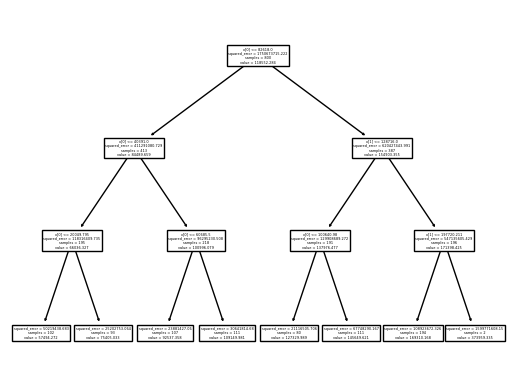

In [87]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
model =  DecisionTreeRegressor(max_depth=3, random_state = 0)
#model =  DecisionTreeRegressor( random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
error = metrics.mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(score)


tree.plot_tree(model)